# Project 2
- Submitted by: Yiang Yuet Meng


#### The coding will be using the below listed stages:
##### 1 - Data Importing
##### 2 - Exploratory data analysis
##### 3 - Data preparation
##### 4 - Feature engineering
##### 5 - Train/Score/Evaluate/Cross Validation/Hyperparameters tuning of Model
##### 6 - Results
##### 7 - Conclusion


## Problem Statement
- I am working for auction house. Currently, I have a list of houses that are to be auctioned. 
- My task is to predict the sale price of the houses and present to my bosses and seek approval for the list of prices to serve as a base cost for the houses.

## Housing
- For this problem, use only 1 target output variable **price**
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

#### Background on Ames Housing dataset
##### - There is 2 datasets namely test.csv and train.csv
##### - The price column is the target variable.
##### - The rest of the variables are the features.
##### - We are supposed to evaluate and train a best model that use price as target variable and the rest of variables as input features. 
##### - We will then used the best trained model to predict price by plotting the actual price vs predicted price.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,Lasso, LassoCV, Ridge,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from datetime import datetime


# 1- Data Importing

In [2]:
#import the dataset
housing_train= pd.read_csv('datasets/train.csv',sep=',')
housing_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#import the test dataset
housing_test= pd.read_csv('datasets/test.csv',sep=',')
housing_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
# To check for any missing values using sum
housing_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

## There are missing values from the train dataset.

In [5]:
# To check for any missing values using sum
housing_test.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

## There are missing values from the test dataset.

# 2 - Exploratory Data Analysis

#### The features are the following:
- SalesPrice: The property's sale price in dollars. This is the target variable to be predicted 
- MSSubClass: The building class
- MSZoning: Identifies the general zoning classification of the sale
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual:Exterior material quality
- ExterCond:Present condition of the material on the exterior
- Foundation:Type of foundation
- BsmtQual:Height of the basement
- BsmtCond::General condition of the basement
- BsmtExposure:Walkout or garden level basement walls
- BsmtFinType1:Quality of basement finished area
- BsmtFinSF1:Type 1 finished square feet
- BsmtFinType2:Quality of second finished area (if present)
- BsmtFinSF2:Type 2 finished square feet
- BsmtUnfSF:Unfinished square feet of basement area
- TotalBsmtSF:Total square feet of basement area
- Heating:Type of heating
- HeatingQC:Heating quality and condition
- CentralAir:Central air conditioning
- Electrical:Electrical system
- 1stFlrSF:First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale


- To study the data types in the datase by calling dtype

In [6]:
# Get datatype
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Summary of Ames Housing Dataset
- There are 11 variables that are float64, 26 variables are int64 and 42 variable is object data type.
- There are missing values.

## Data Cleaning
- Fix missing values
- Lot Frontage - assign 0 to null values
- Mas Vnr Area- assign 0 to null values
- BsmtFin SF 1- assign 0 to null values
- BsmtFin SF 2 - assign 0 to null values
- Total Bsmt SF- assign 0 to null values
- Bsmt Full Bath- assign 0 to null values
- Bsmt Half Bath- assign 0 to null values
- Garage Yr Blt- assign 0 to null values
- Garage Cars - assign 0 to null values
- Garage Area - assign 0 to null values


In [7]:
housing_train['Lot Frontage'].fillna(0, inplace=True)
housing_train['Mas Vnr Area'].fillna(0, inplace=True)
housing_train['BsmtFin SF 1'].fillna(0, inplace=True)
housing_train['BsmtFin SF 2'].fillna(0, inplace=True)
housing_train['Total Bsmt SF'].fillna(0, inplace=True)
housing_train['Bsmt Full Bath'].fillna(0, inplace=True)
housing_train['Bsmt Half Bath'].fillna(0, inplace=True)
housing_train['Garage Yr Blt'].fillna(0, inplace=True)
housing_train['Garage Cars'].fillna(0, inplace=True)
housing_train['Garage Area'].fillna(0, inplace=True)
housing_train['Bsmt Unf SF'].fillna(0, inplace=True)
housing_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
# Read 'kc_house_data.csv' dataset statistics 
housing_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


- I consolidate all the bathrooms and store in a new filed 'baths'

In [9]:
# Consolidating bathrooms
baths = [x for x in housing_train.columns if 'Bath' in x]
housing_train['Total Baths'] = housing_train[baths].sum(axis=1)
housing_train.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

-  Square Feet: I add up the area of the houses into a single ‘total sq ft’ column. 

In [10]:
# Creating a new column of total square feet
housing_train['totalsqft'] = housing_train['Total Bsmt SF'] + housing_train['Gr Liv Area'] + housing_train['Wood Deck SF']+ housing_train['Open Porch SF'] + housing_train['Enclosed Porch']+housing_train['3Ssn Porch'] +housing_train['Screen Porch']

- Is Remodelled: I introduced a new field to indicate that the house has been remodelled.

In [11]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'
housing_train['is_remodelled'] = np.where(housing_train['Year Remod/Add'] - housing_train['Year Built'] > 0, 1, 0)
housing_train.drop(['Year Remod/Add'], axis=1, inplace=True)

- Garage: I transformed the categorical ‘Garage Finish’ column into ‘Has Finished Garage’ and ‘Has Detached Garage’ using one-hot encoding to indicate finished vs unfinished garages. All remaining garage columns were dropped. 

In [12]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column
searchfor = 'Fin', 'RFn'
housing_train['has_finished_garage'] = np.where(housing_train['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)
housing_train['Detached Garage'] = np.where(housing_train['Garage Type'].str.contains('Detchd'), 1, 0)
housing_train.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

- Basement: There were multiple categorical columns describing type of basement finish, so I converted these into a one-hot encoded ‘Has Finished Basement’ column and dropped the originals.

In [13]:
# Consolidating basement columns into 'Has Finished Basement'

lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'

housing_train['Has Finished Basement'] = np.where(housing_train['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
housing_train['Has Finished Basement'] = np.where(housing_train['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)

-  ‘Pool QC’ changed to ‘Has Pool’

In [14]:
# Pool
housing_train['has_pool'] = np.where(housing_train['Pool QC'].str.contains('NA'), 0, 1)
housing_train.drop(['Pool QC'], axis=1, inplace=True)

-  ‘Fence’ changed to ‘Has Fence’

In [15]:
# Fence
housing_train['has_fence'] = np.where(housing_train['Fence'].str.contains('NA'), 0, 1)
housing_train.drop(['Fence'], axis=1, inplace=True)

-  ‘Paved Drive’ changed to ‘Has Paved Drive’

In [16]:
# Paved Drive
housing_train['has_paved_drive'] = np.where(housing_train['Paved Drive'].str.contains('N'), 0, 1)
housing_train.drop(['Paved Drive'], axis=1, inplace=True)

-  ‘Central Air’ changed to ‘Has Central Air’

In [17]:
# Central Air
housing_train['has_central_air'] = np.where(housing_train['Central Air'].str.contains('N'), 0, 1)
housing_train.drop(['Central Air'], axis=1, inplace=True)

- A number of categorical variables were transformed into dummy columns:
- 'Lot Config'
- 'MS Zoning'
- 'Misc Feature'
- 'Neighbourhood'
- 'House Style'
- 'Bldg Type'

In [18]:
# Created dummy columns
housing_train = pd.get_dummies(housing_train, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 
                                   'House Style', 'Bldg Type','Neighborhood'], drop_first=True)

- Transform the categorical quality ranging to ordinal ones

In [19]:
# Quality rankings - transforming categorical vairables to ordinal ones
cols = ['Bsmt Qual', 'Bsmt Cond', 'Fireplace Qu', 'Heating QC','Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual', 'Exter Qual', 'Exter Cond']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    housing_train[x] = housing_train[x].map(lambda x: rankings.get(x, x))
    
    
housing_train.head(20)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,109,533352170,60,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
5,138,535126040,20,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
6,2827,908186070,180,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
7,145,535154050,20,0.0,12160,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
8,1942,535353130,20,0.0,15783,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,0
9,1956,535426130,60,70.0,11606,Pave,NaN,IR1,HLS,AllPub,...,0,0,0,0,0,0,0,0,0,0


- Year Built: I chose to convert this year column into ‘Age,’ as a way of addressing the nebulous relationship between year as a point in time, and year as a number.

In [20]:
# Turning the 'Year Built' column into 'Age'
now = datetime.now()
housing_train['current_year'] = now.year
housing_train['age'] = housing_train['current_year'] - housing_train['Year Built']
housing_train.drop(['current_year', 'Year Built', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

- Export the dataset to csv to review what are the fields (non-numeric or redundant) to be removed

In [21]:
housing_train.to_csv('housing_train.csv', index=False)

- To remove object fields ('Street', 'Alley','Lot Shape','Land Contour','Electrical','Utilities','Land Slope','Condition 1','Condition 2','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Functional','Sale Type','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2')
- I have add on the area size to put into one field. Thus, I remove the fields on areas size who are 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'.

In [22]:
housing_train.drop(['Street', 'Alley','Lot Shape','Land Contour','Electrical','Utilities','Land Slope','Condition 1','Condition 2','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Functional','Sale Type','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2'], axis=1, inplace=True)
housing_train['Fireplace Qu'].fillna(0, inplace=True)
housing_train['Bsmt Qual'].fillna(0, inplace=True)
housing_train['Bsmt Cond'].fillna(0, inplace=True)
housing_train.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'], axis=1, inplace=True)
housing_train.to_csv('housing_train.csv', index=False)

In [23]:
# Do a correction for numerical features and sort to determine the most important features relative to Price
corr = housing_train.corr()
corr = corr[abs(corr) >= 0.5]
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(50))

SalePrice                1.000000
Overall Qual             0.800207
totalsqft                0.784709
Exter Qual               0.712146
Kitchen Qual             0.692336
Garage Area              0.649897
Garage Cars              0.647781
Bsmt Qual                0.612188
Total Baths              0.609641
Fireplace Qu             0.538925
TotRms AbvGrd            0.504014
Mas Vnr Area             0.503579
age                     -0.571849
Id                            NaN
PID                           NaN
MS SubClass                   NaN
Lot Frontage                  NaN
Lot Area                      NaN
Overall Cond                  NaN
Exter Cond                    NaN
Bsmt Cond                     NaN
Heating QC                    NaN
Bedroom AbvGr                 NaN
Kitchen AbvGr                 NaN
Fireplaces                    NaN
Garage Qual                   NaN
Garage Cond                   NaN
Pool Area                     NaN
Misc Val                      NaN
is_remodelled 

Text(0.5, 1.0, 'Correlation Matrix: Ames Housing Data Set Variables ')

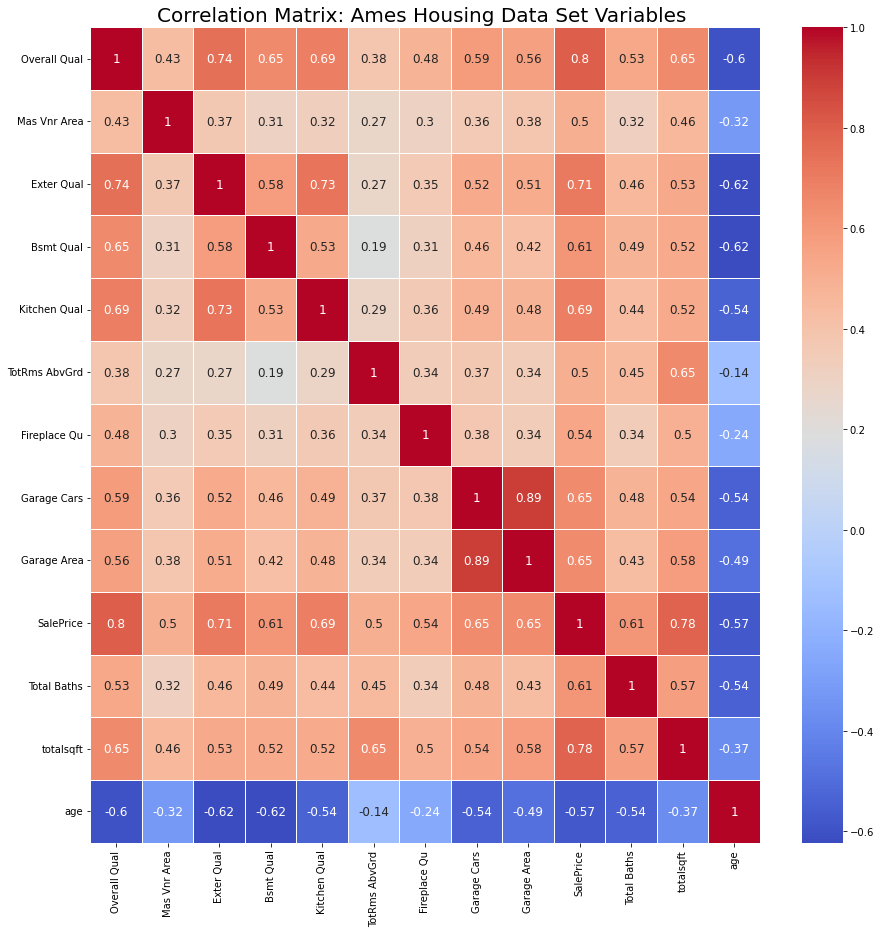

In [24]:
#plt.figure(figsize=(15,15))
#sns.heatmap(housing_train.corr(), annot=True)

correlations = housing_train.corr()['SalePrice'][abs(housing_train.corr()['SalePrice']) >= .5]
corr_list = [x for x in correlations.index]

fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(housing_train[corr_list].corr(), annot=True, linewidths=1, cmap="coolwarm", annot_kws={"size": 12})
ax.set_title('Correlation Matrix: Ames Housing Data Set Variables ', fontsize=20)

## Summary of correlation
- Top features that have a strong correlation to salesprice are Overall Qual, totalsqft, Exter Qual,Kitchen Qual, Garage Area,Garage Cars,Bsmt Qual,Total Baths, Fireplace Qu, TotRms AbvGrd, Mas Vnr Area, age

- Cleaning of Test Data

In [25]:
housing_test['Lot Frontage'].fillna(0, inplace=True)
housing_test['Mas Vnr Area'].fillna(0, inplace=True)
housing_test['BsmtFin SF 1'].fillna(0, inplace=True)
housing_test['BsmtFin SF 2'].fillna(0, inplace=True)
housing_test['Total Bsmt SF'].fillna(0, inplace=True)
housing_test['Bsmt Full Bath'].fillna(0, inplace=True)
housing_test['Bsmt Half Bath'].fillna(0, inplace=True)
housing_test['Garage Yr Blt'].fillna(0, inplace=True)
housing_test['Garage Cars'].fillna(0, inplace=True)
housing_test['Garage Area'].fillna(0, inplace=True)
housing_test['Bsmt Unf SF'].fillna(0, inplace=True)
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [26]:
# Read 'test' dataset statistics 
housing_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,56.872437,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.115034,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,34.269502,10002.674602,1.369065,1.128903,30.395895,20.450725,187.086530,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,0.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,40.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,60.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [27]:
# Consolidating bathrooms
baths = [x for x in housing_test.columns if 'Bath' in x]
housing_test['Total Baths'] = housing_test[baths].sum(axis=1)
housing_test.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

In [28]:
# Creating a new column of total square feet
housing_test['totalsqft'] = housing_test['Total Bsmt SF'] + housing_test['Gr Liv Area'] + housing_test['Wood Deck SF']+ housing_test['Open Porch SF'] + housing_test['Enclosed Porch']+housing_test['3Ssn Porch'] +housing_test['Screen Porch']

In [29]:
# Converting 'Year Remod/Add' to numerical 'Is Remodeled'
housing_test['is_remodelled'] = np.where(housing_test['Year Remod/Add'] - housing_test['Year Built'] > 0, 1, 0)
housing_test.drop(['Year Remod/Add'], axis=1, inplace=True)

In [30]:
# Creating 'Has Finished Garage' column for Finished or Rough Finished garages, and 'Has Detached Garage' column
searchfor = 'Fin', 'RFn'
housing_test['has_finished_garage'] = np.where(housing_test['Garage Finish'].str.contains('|'.join(searchfor)), 1, 0)
housing_test['Detached Garage'] = np.where(housing_test['Garage Type'].str.contains('Detchd'), 1, 0)
housing_test.drop(['Garage Finish', 'Garage Yr Blt', 'Garage Type',], axis=1, inplace=True)

In [31]:
# Consolidating basement columns into 'Has Finished Basement'
lookfor = 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'
housing_test['Has Finished Basement'] = np.where(housing_test['BsmtFin Type 2'].str.contains('|'.join(lookfor)), 1, 0)
housing_test['Has Finished Basement'] = np.where(housing_test['BsmtFin Type 1'].str.contains('|'.join(lookfor)), 1, 0)

In [32]:
# Pool
housing_test['has_pool'] = np.where(housing_test['Pool QC'].str.contains('NA'), 0, 1)
housing_test.drop(['Pool QC'], axis=1, inplace=True)

In [33]:
# Fence
housing_test['has_fence'] = np.where(housing_test['Fence'].str.contains('NA'), 0, 1)
housing_test.drop(['Fence'], axis=1, inplace=True)

In [34]:
# Paved Drive
housing_test['has_paved_drive'] = np.where(housing_test['Paved Drive'].str.contains('N'), 0, 1)
housing_test.drop(['Paved Drive'], axis=1, inplace=True)

In [35]:
# Central Air
housing_test['has_central_air'] = np.where(housing_test['Central Air'].str.contains('N'), 0, 1)
housing_test.drop(['Central Air'], axis=1, inplace=True)

In [36]:
# Created dummy columns
housing_test = pd.get_dummies(housing_test, columns = ['Lot Config', 'MS Zoning', 'Misc Feature', 
                                   'House Style', 'Bldg Type','Neighborhood'], drop_first=True)

In [37]:
# Quality rankings - transforming categorical vairables to ordinal ones
cols = ['Bsmt Qual', 'Bsmt Cond', 'Fireplace Qu', 'Heating QC','Garage Qual', 'Garage Cond', 'Exter Qual', 
        'Exter Cond', 'Kitchen Qual', 'Exter Qual', 'Exter Cond']

rankings = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    housing_test[x] = housing_test[x].map(lambda x: rankings.get(x, x))

In [38]:
# Turning the 'Year Built' column into 'Age'
now = datetime.now()
housing_test['current_year'] = now.year
housing_test['age'] = housing_test['current_year'] - housing_test['Year Built']
housing_test.drop(['current_year', 'Year Built', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

In [39]:
housing_test.drop(['Street', 'Alley','Lot Shape','Land Contour','Electrical','Utilities','Land Slope','Condition 1','Condition 2','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Functional','Sale Type','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2'], axis=1, inplace=True)
housing_test['Fireplace Qu'].fillna(0, inplace=True)
housing_test['Bsmt Qual'].fillna(0, inplace=True)
housing_test['Bsmt Cond'].fillna(0, inplace=True)
housing_test.drop(['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Gr Liv Area'], axis=1, inplace=True)

housing_test.to_csv('housing_test.csv', index=False)

- Analysing the predictors and response

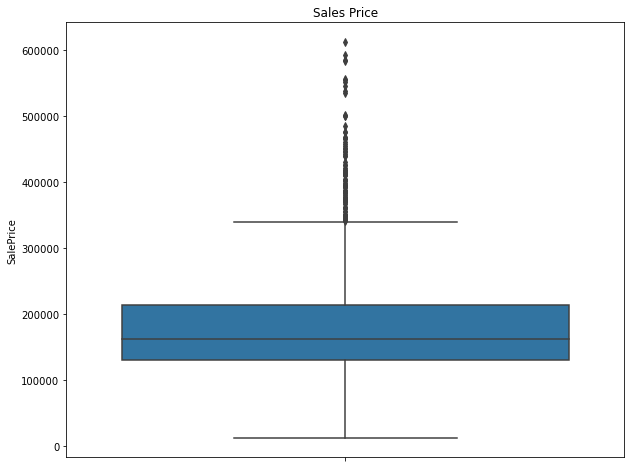

Median price: $162500.00
Mean price: $181469.70


In [40]:
# Plot boxplot for price column
plt.subplots(figsize=(10,8))
plt.title("Sales Price")
ax = sns.boxplot(y=housing_train["SalePrice"])
median_price = housing_train["SalePrice"].median()
mean_price = housing_train["SalePrice"].mean()
plt.show()
print("Median price: ${:.2f}".format(median_price))
print("Mean price: ${:.2f}".format(mean_price))

- Boxplot of Age against price

Median price: $162500.00
Mean price: $181469.70


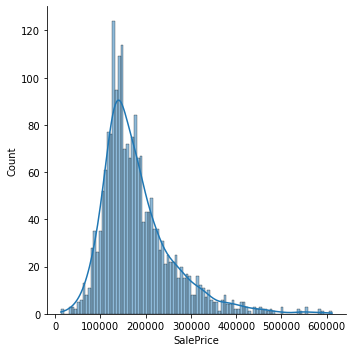

In [41]:
median_val = housing_train["SalePrice"].median()
mean_val = housing_train["SalePrice"].mean()
sns.displot(housing_train['SalePrice'],bins=100,kde=True)
print("Median price: ${:.2f}".format(median_val))
print("Mean price: ${:.2f}".format(mean_val))

## Summary of Sale price
- Median price is S162,500.00
- Mean price is $181,469.70
- There seemed to have many outlier points observed at higher price range.
- May need to log the price data in order to get a narrow range with a normal distribution.

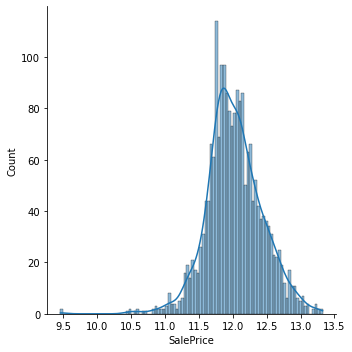

In [42]:
sns.displot(np.log(housing_train['SalePrice']),bins=100,kde=True)


- After I perform a logarithmic transformation of the Sale Price, it made highly skewed distributions less skewed

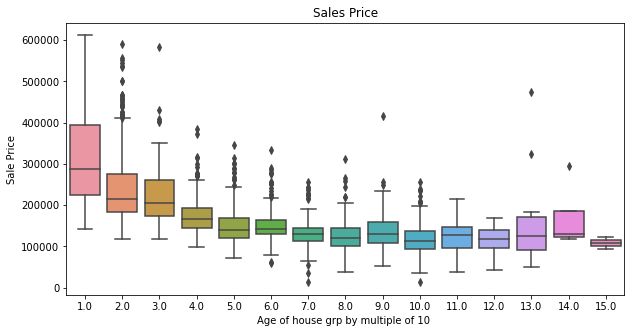

In [43]:
housing_train_grp= housing_train
housing_train_grp['age_cat']=round(housing_train['age']/10)
housing_train_grp

plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train_grp["age_cat"], y=housing_train["SalePrice"])
ax.set(xlabel='Age of house grp by multiple of 10 ',ylabel='Sale Price')
plt.show()





## Summary Age against Sale Price
- defined the age of the building as the year of sale minus the year of construction. New houses have a price premium that declines as they age even by one or two years. After a while the effect of age plateaus off, only to come back for very old houses

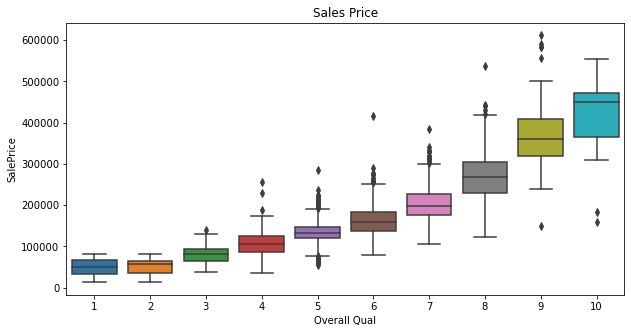

In [44]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Overall Qual"], y=housing_train["SalePrice"])
plt.show()

## Overall Quality against Sale Price
-   Overall Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices. 

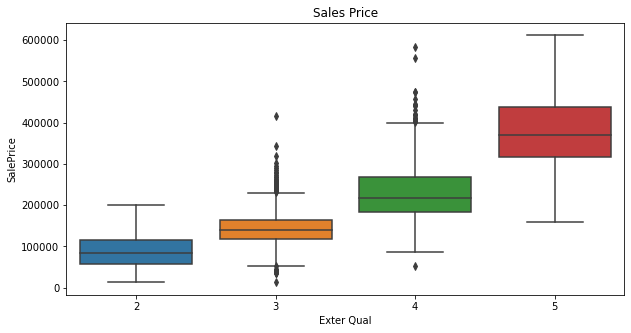

In [45]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Exter Qual"], y=housing_train["SalePrice"])
plt.show()

## External Quality against Sale Price
-   External Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices. 

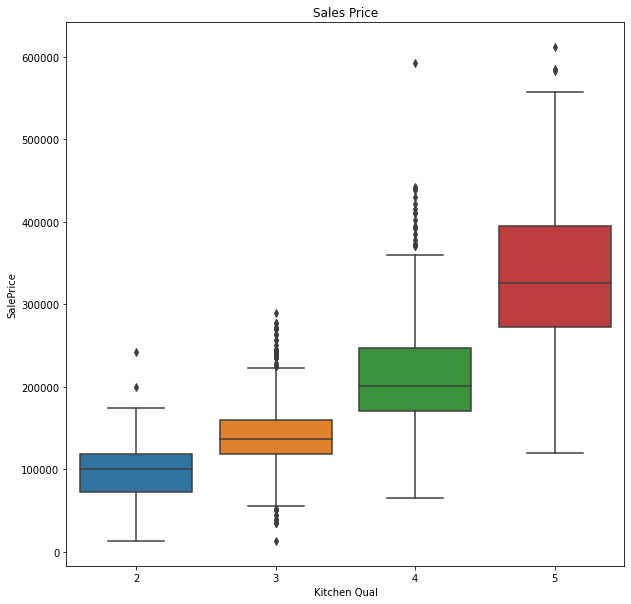

In [46]:
plt.subplots(figsize=(10,10))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Kitchen Qual"], y=housing_train["SalePrice"])
plt.show()

## Kitchen Quality against Sale Price
-   Kitchen Quality  of the houses from one to ten. It turns out they are great predictors of sale price, with higher quality and commanding higher prices.

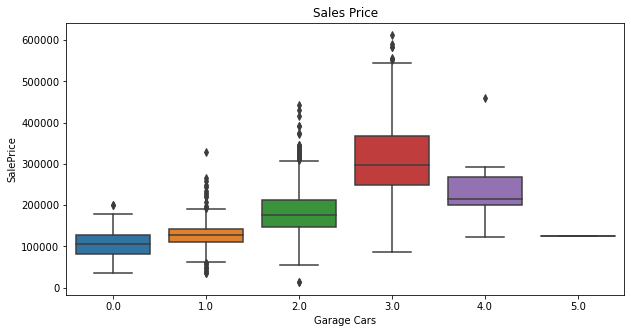

In [47]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot(x=housing_train["Garage Cars"], y=housing_train["SalePrice"])
plt.show()

## Garage Cars against Sale Price
-   Sale Price increases with the increase in garage cars. Once it reaches 4 Garage cars, the increase in price drops instead of increase.

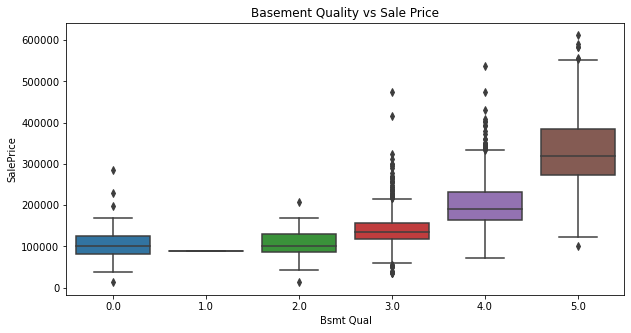

In [48]:
plt.subplots(figsize=(10,5))
plt.title("Basement Quality vs Sale Price")
ax = sns.boxplot(x=housing_train["Bsmt Qual"], y=housing_train["SalePrice"])
plt.show()

## Bsmt Quality wrt Sale Price
-   Sale Price increases with the increase in Basement Quality. 

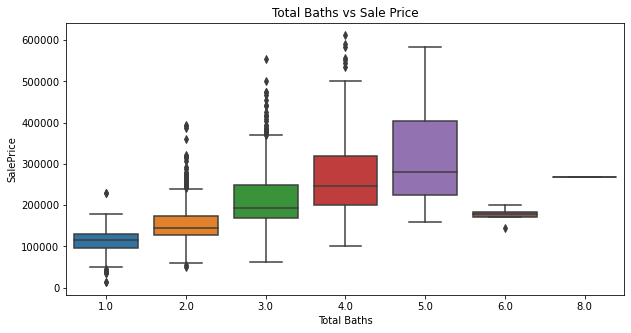

In [49]:
plt.subplots(figsize=(10,5))
plt.title("Total Baths vs Sale Price")
ax = sns.boxplot(x=housing_train["Total Baths"], y=housing_train["SalePrice"])
plt.show()

## No of Baths wrt Sale Price
-   Sale Price increases with the increase in no of baths. When it is beyond 5, it will not have effect on the price

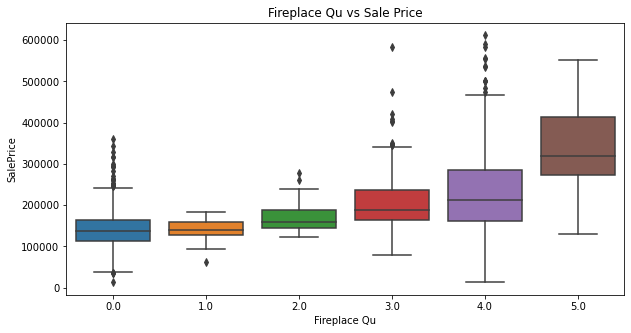

In [50]:
plt.subplots(figsize=(10,5))
plt.title("Fireplace Qu vs Sale Price")
ax = sns.boxplot(x=housing_train["Fireplace Qu"], y=housing_train["SalePrice"])
plt.show()

## Fireplace Quality wrt Sale Price
-   Sale Price increases with the increase in fireplace quality. 

array([[<AxesSubplot:title={'center':'totalsqft'}>,
        <AxesSubplot:title={'center':'Garage Area'}>],
       [<AxesSubplot:title={'center':'TotRms AbvGrd'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

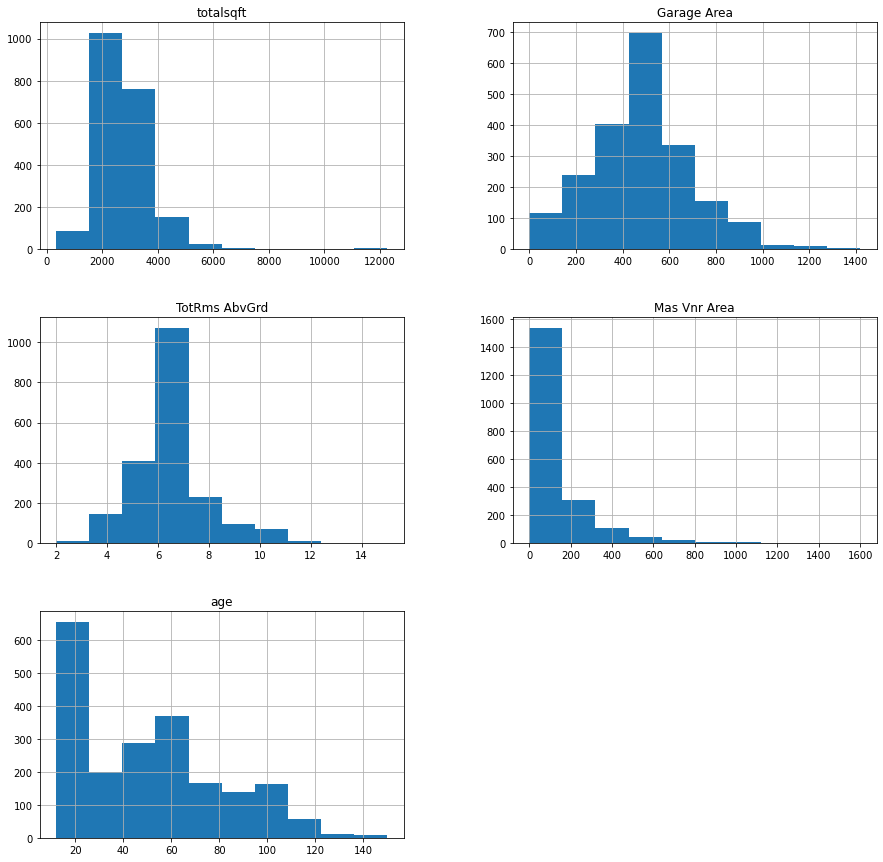

In [51]:
housing_train_hist = housing_train[[ 'totalsqft','Garage Area','TotRms AbvGrd','Mas Vnr Area', 'age']]

housing_train_hist.hist(figsize=(15,15))

## Summary of Histogram Plot for the predictors

#  3- Data Preparation

#### Summary of Data Preparation
- All the missing data is rectified.
- Those fields (Fireplaces, BsmtFin SF 1,Open Porch SF, Wood Deck SF, Lot Area,Bsmt Full Bath,Half Bath, Garage Yr Blt,2nd Flr SF,Bsmt Unf SF,Lot Frontage,Bedroom AbvGr,Screen Porch,3Ssn Porch,Pool Area,BsmtFin SF 2,Misc Val,Low Qual Fin SF,Bsmt Half Bath, MS SubClass, Overall Cond, Kitchen AbvGr, Enclosed Porch,PID ) with correlation <0.5 which is below moderate are dropped
- Year Remod/Add','Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath','Garage Finish', 'Garage Yr Blt', 'Garage Type','Pool QC','Fence','Paved Drive','Central Air','current_year', 'Year Built', 'Mo Sold', 'Yr Sold' are dropped
- id column will be dropped as it is a running sequence.

## 4 - Feature Engineering

In [52]:
X = housing_train[['Overall Qual', 'totalsqft','Exter Qual','Kitchen Qual','Garage Area','Garage Cars','Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd','Mas Vnr Area', 'age']]
y= np.log(housing_train['SalePrice'])



In [53]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     865.5
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:41:51   Log-Likelihood:                 766.09
No. Observations:                2051   AIC:                            -1506.
Df Residuals:                    2038   BIC:                            -1433.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.6232      0.040    264.599      0.000      10.544      10.702
Overall Qual      0.0831      0.005     16.961      0.000       0.074       0.093
totalsqft         0.0001   7.84e-06     15.896      0.000       0.000       0.000
Exter Qual        0.0104      0.011      0.952      0.341      -0.011       0.032
Kitchen Qual      0.0626      0.009      7.205      0.000       0.046       0.080
Garage Area       0.0001   4.05e-05      2.512      0.012    2.23e-05       0.000
Garage Cars       0.0383      0.012      3.297      0.001       0.016       0.061
Bsmt Qual         0.0182      0.006      2.953      0.003       0.006       0.030
Total Baths       0.0415      0.005      7.595      0.000       0.031       0.052
Fireplace Qu      0.0227      0.002      9.251      0.000       0.018       0.028
TotRms AbvGrd     0.0091      0.003      2.705      0.007       0.003       0.016
Mas Vnr Area  -1.937e-05   2.46e-05     -0.789      0.430   -6.75e-05    2.88e-05
age              -0.0016      0.000     -8.457      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1620.406   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90658.993
Skew:                          -3.244   Prob(JB):                         0.00
Kurtosis:                      34.918   Cond. No.                     3.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P Value of 'Exter Qual', 'Mas Vnr Area'  are more than 0.05 which is not significant. I decide to remove these features from the model. 

In [54]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Area','Garage Cars','Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd', 'age']]
y= np.log(housing_train['SalePrice'])


In [55]:
X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1039.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:41:51   Log-Likelihood:                 765.34
No. Observations:                2051   AIC:                            -1509.
Df Residuals:                    2040   BIC:                            -1447.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.6408      0.037    291.087      0.000      10.569      10.712
Overall Qual      0.0842      0.005     18.086      0.000       0.075       0.093
totalsqft         0.0001   7.73e-06     16.036      0.000       0.000       0.000
Kitchen Qual      0.0660      0.008      8.305      0.000       0.050       0.082
Garage Area       0.0001   4.03e-05      2.509      0.012    2.21e-05       0.000
Garage Cars       0.0384      0.012      3.307      0.001       0.016       0.061
Bsmt Qual         0.0187      0.006      3.035      0.002       0.007       0.031
Total Baths       0.0413      0.005      7.564      0.000       0.031       0.052
Fireplace Qu      0.0226      0.002      9.209      0.000       0.018       0.027
TotRms AbvGrd     0.0091      0.003      2.707      0.007       0.003       0.016
age              -0.0016      0.000     -8.798      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1619.904   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90652.597
Skew:                          -3.243   Prob(JB):                         0.00
Kurtosis:                      34.917   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P Value of 'Mas Vnr Area' are more than 0.05 which is not significant. I decide to remove these features from the model.

## 5. Train/Score/Evaluate/Cross Validation/Hyperparameters tuning of Model

## Split data to train and test set

In [56]:
X = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Area','Garage Cars','Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd', 'age']]
y= np.log(housing_train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

## Fit Model with: Linear Regression Model Degree 1

In [57]:
# Fit the Training Set
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


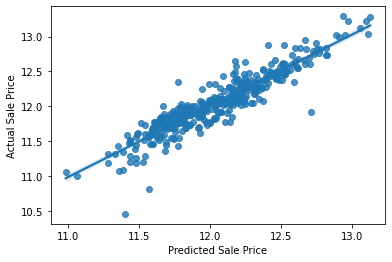

In [58]:
ax=sns.regplot(lr.predict(X_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


## Fit Model with: Linear Regression Model Degree 2

In [59]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X_train)
X_overfit_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly2_model = LinearRegression()
poly2_model.fit(X_overfit, y_train) 

   

LinearRegression()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


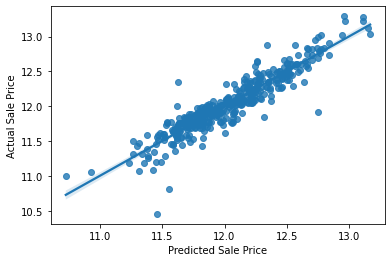

In [60]:
ax=sns.regplot(poly2_model.predict(X_overfit_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


## Fit Model with: Linear Regression Model Degree 3

In [61]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit_3 = poly.fit_transform(X_train)
X_overfit_3_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly3_model = LinearRegression()
poly3_model.fit(X_overfit_3, y_train) 
   

LinearRegression()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


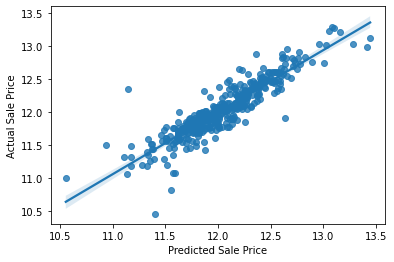

In [62]:
ax=sns.regplot(poly3_model.predict(X_overfit_3_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


## Fit Model with: Linear Regression Model Degree 4

In [63]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit_4 = poly.fit_transform(X_train)
X_overfit_4_test=poly.transform(X_test)

# fit the transformed features to Linear Regression
poly4_model = LinearRegression()
poly4_model.fit(X_overfit_4, y_train) 

LinearRegression()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


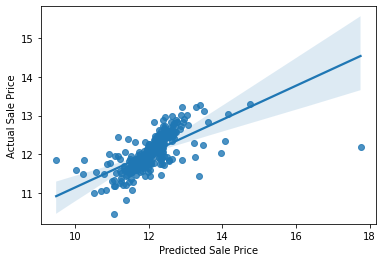

In [64]:
ax=sns.regplot(poly4_model.predict(X_overfit_4_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


## Fit Model with: RidgeCV Model

In [65]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)


In [66]:
# Fit model using best ridge alpha!
r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv = ridge_cv.fit(Z_train, y_train)


In [67]:
ridge_cv.alpha_

104.76157527896652

## Fit Model with: Ridge Model with optimal alpha

In [68]:
# Fit model using best ridge alpha!
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge = ridge.fit(Z_train, y_train)


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


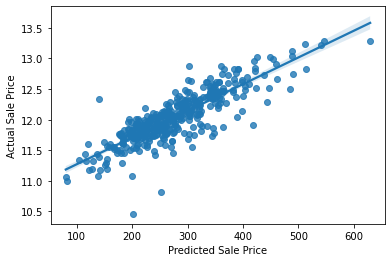

In [69]:
ax=sns.regplot(ridge.predict(X_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: RidgeCV Model Degree=2

In [70]:
# Creates a polynomial ridge regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_ridge_poly2 = poly.fit_transform(Z_train)
X_test_ridge_poly2 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly2_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly2_cv = ridge_poly2_cv.fit(X_train_ridge_poly2, y_train)


In [71]:
ridge_poly2_cv.alpha_

65.79332246575679

## Fit Model with: Ridge Model Degree=2 with optimal alpha

In [72]:
# Fit model using best alpha!
ridge_poly2 = Ridge(alpha=ridge_poly2_cv.alpha_)
ridge_poly2 = ridge_poly2.fit(X_train_ridge_poly2, y_train)

#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly2.predict(X_train_ridge_poly2)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly2.predict(X_test_ridge_poly2)))

Ridge Regression Train MSE 0.020517549721110532
Ridge Regression Test MSE 0.023634145039232196


In [73]:
ridge_poly2_cv.alpha_

65.79332246575679

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


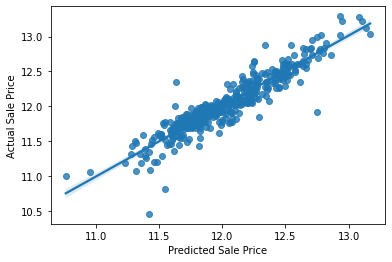

In [74]:
ax=sns.regplot(ridge_poly2.predict(X_test_ridge_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: RidgeCV Model Degree=3

In [75]:
# Creates a polynomial ridge regression model for degree =3
poly = PolynomialFeatures(3)

# transforms the existing features to higher degree features.
X_train_ridge_poly3 = poly.fit_transform(Z_train)
X_test_ridge_poly3 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly3_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly3_cv = ridge_poly3_cv.fit(X_train_ridge_poly3, y_train)


In [76]:
ridge_poly3_cv.alpha_

376.49358067924675

## Fit Model with: Ridge Model Degree=3 with optimal alpha

In [77]:
# Fit model using best alpha!
ridge_poly3 = Ridge(alpha=ridge_poly3_cv.alpha_)
ridge_poly3 = ridge_poly3.fit(X_train_ridge_poly3, y_train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


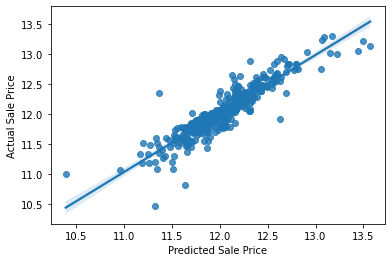

In [78]:
ax=sns.regplot(ridge_poly3.predict(X_test_ridge_poly3),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: RidgeCV Model Degree=4

In [79]:
# Creates a polynomial ridge regression model for degree =4
poly = PolynomialFeatures(4)

# transforms the existing features to higher degree features.
X_train_ridge_poly4 = poly.fit_transform(Z_train)
X_test_ridge_poly4 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_poly4_cv = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_poly4_cv = ridge_poly4_cv.fit(X_train_ridge_poly4, y_train)


In [80]:
ridge_poly4_cv.alpha_

19630.406500402725

## Fit Model with: Ridge Model Degree=4 with optimal alpha

In [81]:
# Fit model using best alpha!
ridge_poly4 = Ridge(alpha=ridge_poly4_cv.alpha_)
ridge_poly4 = ridge_poly4.fit(X_train_ridge_poly4, y_train)


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


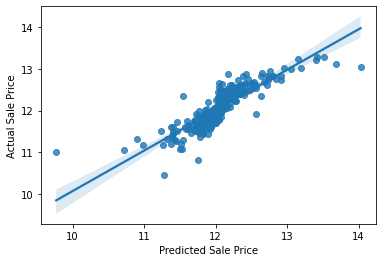

In [82]:
ax=sns.regplot(ridge_poly4.predict(X_test_ridge_poly4),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: LassoCV Model

In [83]:
# Fit model using best lasso alpha!
l_alphas = np.logspace(-3, 0, 100)
#print(l_alphas)

# Cross-validate over our list of lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
lasso_cv = lasso_cv.fit(Z_train, y_train)


In [84]:
lasso_cv.alpha_

0.002009233002565048

## Fit Model with: Lasso Model with optimal alpha

In [85]:
# Fit model using best alpha!
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso = lasso.fit(Z_train, y_train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


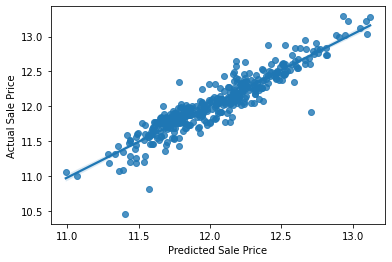

In [86]:
ax=sns.regplot(lasso.predict(Z_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: Lasso Model Degree 2

In [87]:
# Creates a polynomial lasso regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X_train_lasso_poly2 = poly.fit_transform(Z_train)
X_test_lasso_poly2 = poly.transform(Z_test)

r_alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of lasso alphas.
lasso_poly2_cv = LassoCV(alphas=r_alphas, cv=5)
lasso_poly2_cv = lasso_poly2_cv.fit(X_train_lasso_poly2, y_train)

In [88]:
lasso_poly2_cv.alpha_

100000.0

## Fit Model with: Lasso Model Degree 2 with optimal alpha

In [89]:
# Fit model using best alpha!
lasso_poly2 = Lasso(alpha=lasso_poly2_cv.alpha_)
lasso_poly2 = lasso_poly2.fit(X_train_lasso_poly2, y_train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


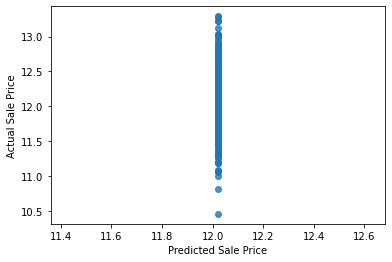

In [90]:
ax=sns.regplot(lasso_poly2.predict(X_test_lasso_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Fit Model with: ElasticNet Model

In [91]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(Z_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(Z_test)
enet_model_preds_train = enet_model.predict(Z_train)

In [92]:
enet_model.alpha_

0.5

In [93]:
enet_model.l1_ratio

0.5

## Fit Model with: ElasticNet Model with optimal alpha and ratio

In [94]:
# Instantiate model.
# Fit model using optimal alpha.
enet_best_model = ElasticNet(alpha=enet_model.alpha_, l1_ratio=enet_model.l1_ratio)
print(enet_best_model)
enet_best_model = enet_best_model.fit(Z_train, y_train)


ElasticNet(alpha=0.5)


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


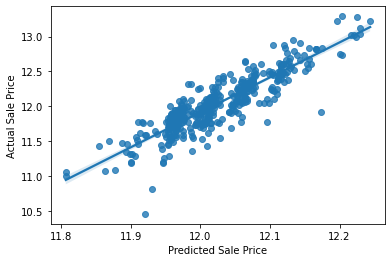

In [95]:
ax=sns.regplot(enet_best_model.predict(Z_test),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()


## Score Model and Evaluate Model with: Linear Regression Model

In [96]:
#Training Set
print('Linear Regression Train MSE',metrics.mean_squared_error(y_train,lr.predict(X_train)))
predict_X_test= lr.predict(X_test)
print('Linear Regression Test MSE',metrics.mean_squared_error(y_test,predict_X_test))

Linear Regression Train MSE 0.02871836725337317
Linear Regression Test MSE 0.02429025756115978


In [97]:
cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.03025966189638025

In [98]:
residuals=y_test- predict_X_test

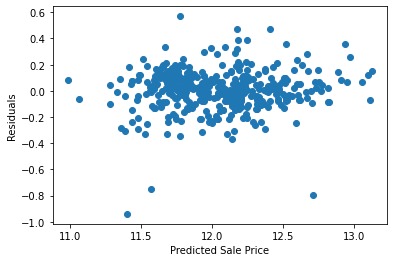

In [99]:
plt.scatter(predict_X_test, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


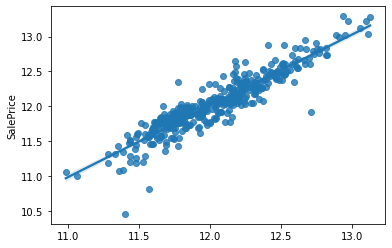

In [100]:
sns.regplot(lr.predict(X_test),y_test)
plt.show()


## Score Model and Evaluate Model with: Linear Regression Model Degree 2

In [101]:
# predicting on training data-set
poly2_y_train_predict = poly2_model.predict(X_overfit)
    
# predicting on test data-set
poly2_y_test_predict = poly2_model.predict(X_overfit_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly2_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly2_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))


MSE of training set is 0.02028496
MSE of test set is 0.02406107


In [102]:
cross_val_score(
    poly2_model,
    X_overfit,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.024583811306377802

In [103]:
residuals=y_test- poly2_y_test_predict

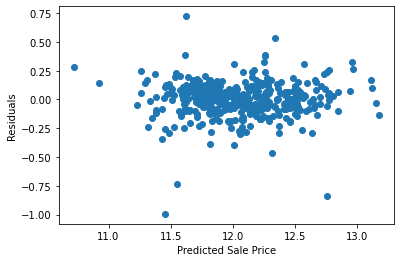

In [104]:
plt.scatter(poly2_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


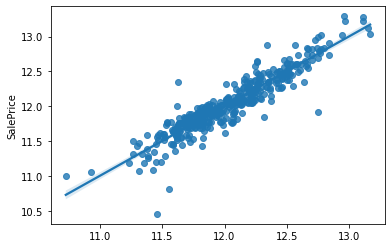

In [105]:
sns.regplot(poly2_y_test_predict,y_test)
plt.show()


## Score Model and Evaluate Model with: Linear Regression Model Degree 3

In [106]:
# predicting on training data-set
poly3_y_train_predict = poly3_model.predict(X_overfit_3)
    
# predicting on test data-set
poly3_y_test_predict = poly3_model.predict(X_overfit_3_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly3_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly3_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))

MSE of training set is 0.01461285
MSE of test set is 0.03120501


In [107]:
cross_val_score(
    poly3_model,
    X_overfit_3,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.06199709808065891

In [108]:
residuals=y_test- poly3_y_test_predict

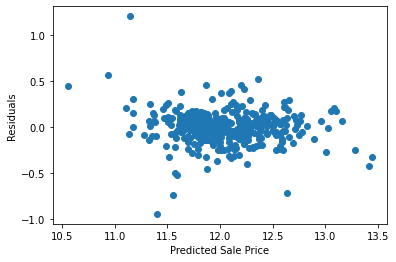

In [109]:
plt.scatter(poly3_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The points in the plot are pretty symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


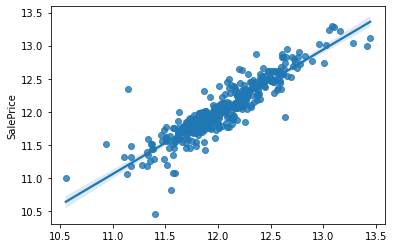

In [110]:
sns.regplot(poly3_y_test_predict,y_test)
plt.show()


## Score Model and Evaluate Model with: Linear Regression Model Degree 4

In [111]:
# predicting on training data-set
poly4_y_train_predict = poly4_model.predict(X_overfit_4)
    
# predicting on test data-set
poly4_y_test_predict = poly4_model.predict(X_overfit_4_test)

# evaluating the model on training dataset
mse_train = metrics.mean_squared_error(y_train, poly4_y_train_predict)

# evaluating the model on test dataset
mse_test = metrics.mean_squared_error(y_test, poly4_y_test_predict)

print("MSE of training set is {:.8f}".format(mse_train))
print("MSE of test set is {:.8f}".format(mse_test))

MSE of training set is 0.00807620
MSE of test set is 0.21694482


In [112]:
cross_val_score(
    poly4_model,
    X_overfit_4,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-2.544365455471457

In [113]:
residuals=y_test- poly4_y_test_predict

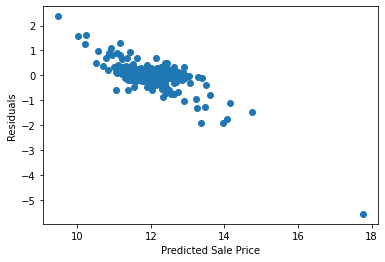

In [114]:
plt.scatter(poly4_y_test_predict, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The plot are not evenly distributed and they have an outlier as they have a clear shape to them. So, we can conclude that this model is not ideal.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


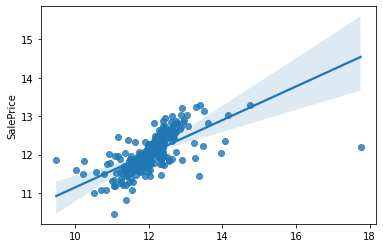

In [115]:
sns.regplot(poly4_y_test_predict,y_test)
plt.show()


## Score Model and Evaluate Model with: Ridge Regression Model

In [116]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge.predict(Z_train)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge.predict(Z_test)))


Ridge Regression Train MSE 0.028831218507909623
Ridge Regression Test MSE 0.024593535056232775


In [117]:
cross_val_score(
    ridge,
    Z_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.030068272885232138

In [118]:
residuals = y_test - ridge.predict(Z_test)

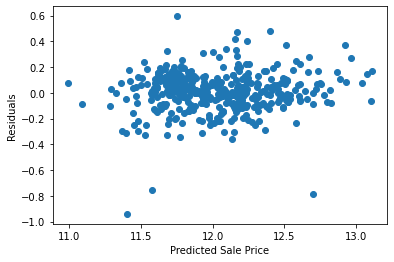

In [119]:
plt.scatter(ridge.predict(Z_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The plot is relatively symmetrically distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


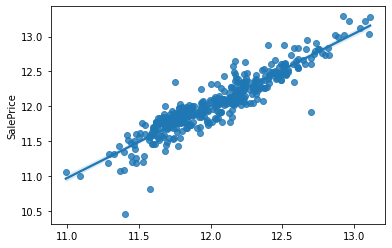

In [120]:
sns.regplot(ridge.predict(Z_test),y_test)
plt.show()

## Score Model and Evaluate Model with: Ridge Regression Model Degree 2

In [121]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly2.predict(X_train_ridge_poly2)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly2.predict(X_test_ridge_poly2)))

Ridge Regression Train MSE 0.020517549721110532
Ridge Regression Test MSE 0.023634145039232196


In [122]:
cross_val_score(
    ridge_poly2,
    X_train_ridge_poly2,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.023915266254815767

In [123]:
residuals = y_test - ridge_poly2.predict(X_test_ridge_poly2)

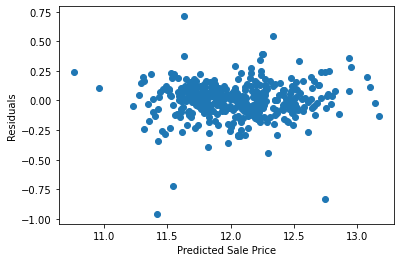

In [124]:
plt.scatter(ridge_poly2.predict(X_test_ridge_poly2), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()


- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


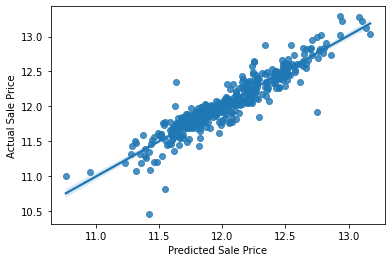

In [125]:
ax=sns.regplot(ridge_poly2.predict(X_test_ridge_poly2),y_test)
ax.set(xlabel='Predicted Sale Price', ylabel='Actual Sale Price')
plt.show()

## Score Model and Evaluate Model with: Ridge Regression Model Degree 3

In [126]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly3.predict(X_train_ridge_poly3)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly3.predict(X_test_ridge_poly3)))

Ridge Regression Train MSE 0.01780170233268262
Ridge Regression Test MSE 0.027336867181414117


In [127]:
cross_val_score(
    ridge_poly3,
    X_train_ridge_poly3,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.029844168853918728

In [128]:
residuals = y_test - ridge_poly3.predict(X_test_ridge_poly3)

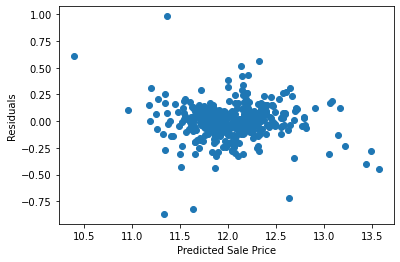

In [129]:
plt.scatter(ridge_poly3.predict(X_test_ridge_poly3), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

#sns.regplot(ridge_poly3.predict(X_test_ridge_poly3), residuals)

- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


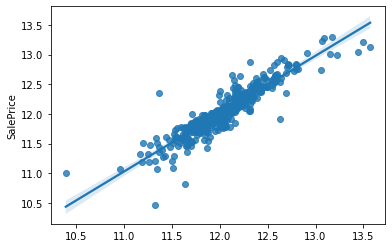

In [130]:
sns.regplot(ridge_poly3.predict(X_test_ridge_poly3),y_test)
plt.show()

## Score Model and Evaluate Model with: Ridge Regression Model Degree 4

In [131]:
#Training Set
print('Ridge Regression Train MSE',metrics.mean_squared_error(y_train,ridge_poly4.predict(X_train_ridge_poly4)))
print('Ridge Regression Test MSE',metrics.mean_squared_error(y_test,ridge_poly4.predict(X_test_ridge_poly4)))

Ridge Regression Train MSE 0.030844580485791646
Ridge Regression Test MSE 0.04520048742066716


In [132]:
cross_val_score(
    ridge_poly4,
    X_train_ridge_poly4,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.04875207798515581

In [133]:
residuals = y_test - ridge_poly4.predict(X_test_ridge_poly4)

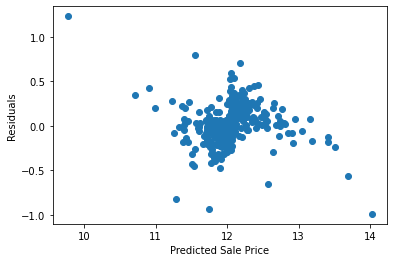

In [134]:
plt.scatter(ridge_poly4.predict(X_test_ridge_poly4), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()
#sns.regplot(ridge_poly4.predict(X_test_ridge_poly4), residuals)

- The plot is not evenly distributed and they have an outlier. There is clear shape of the plot

## Score Model and Evaluate Model with: Lasso Regression Mode

In [135]:
#Training Set
print('Lasso Regression Train MSE',metrics.mean_squared_error(y_train,lasso.predict(Z_train)))
print('Lasso Regression Test MSE',metrics.mean_squared_error(y_test,lasso.predict(Z_test)))


Lasso Regression Train MSE 0.02872769121745429
Lasso Regression Test MSE 0.024330515185106642


In [136]:
cross_val_score(
    lasso,
    Z_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.030251245451425525

In [137]:
residuals = y_test - lasso.predict(Z_test)

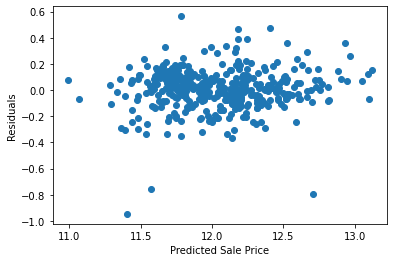

In [138]:
plt.scatter(lasso.predict(Z_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()
#sns.regplot(lasso.predict(Z_test), residuals)
#plt.show()

- The plot is symmetrical distributed tending to cluster towards the middle of the plot

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


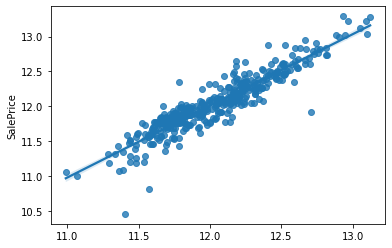

In [139]:
sns.regplot(lasso.predict(Z_test),y_test)
plt.show()

## Score Model and Evaluate Model with: Lasso Degree 2 Regression Mode

In [140]:
#Training Set
print('Lasso Regression Train MSE',metrics.mean_squared_error(y_train,lasso_poly2.predict(X_train_lasso_poly2)))
print('Lasso Regression Test MSE',metrics.mean_squared_error(y_test,lasso_poly2.predict(X_test_lasso_poly2)))


Lasso Regression Train MSE 0.16898931570251494
Lasso Regression Test MSE 0.16958113581952464


In [141]:
cross_val_score(
    lasso_poly2,
    X_train_lasso_poly2,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.16917607892288328

In [142]:
residuals = y_test - lasso_poly2.predict(X_test_lasso_poly2)

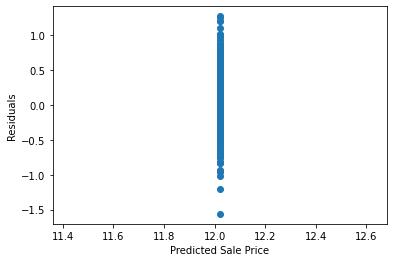

In [143]:
plt.scatter(lasso_poly2.predict(X_test_lasso_poly2), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- There is a clear shape of the plot. This model is not desirable.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


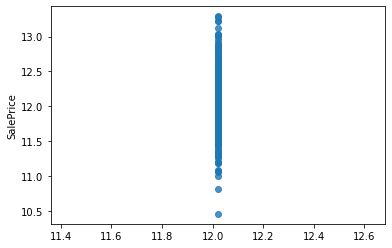

In [144]:
sns.regplot(lasso_poly2.predict(X_test_lasso_poly2),y_test)
plt.show()

## Score Model and Evaluate Model with: ElasticNetCV Regression Mode

In [145]:
#Training Set
print('ElasticNet Train MSE',metrics.mean_squared_error(y_train, enet_best_model.predict(Z_train)))
print('ElasticNet Test MSE',metrics.mean_squared_error(y_test,enet_best_model.predict(Z_test)))

ElasticNet Train MSE 0.1218681398553341
ElasticNet Test MSE 0.12175688412319963


In [146]:
cross_val_score(
    enet_best_model,
    Z_train,
    y_train,
    cv=5,
    scoring= 'neg_mean_squared_error'   # if not specified, then this uses the default. score on given model
).mean()

-0.12232122843040724

In [147]:
residuals = y_test - enet_best_model.predict(Z_test)

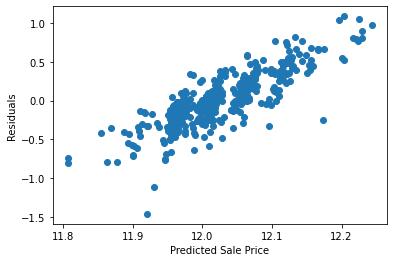

In [148]:
plt.scatter(enet_best_model.predict(Z_test), residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.show()

- The plot has an upwards trend and points are not symmetrically distributed. This model is not desireable

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


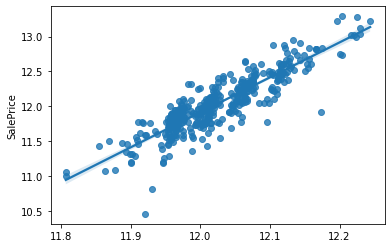

In [149]:
sns.regplot(enet_best_model.predict(Z_test),y_test)
plt.show()

## 6. Results of Model Training and Testing


|Model|Degree|MSE (Train)|MSE (Test)|CVS (MSE)|Remark|
|---|---|---|---|---|---|
|Linear Regression|1|0.02871836725337317|0.02429025756115978|0.03025966189638025|---|
|Linear Regression|2|0.02028496|0.02406107|0.024583811306377802|---|
|Linear Regression|3|0.01461285|0.03120501|0.06199709808065891|---|
|Linear Regression|4|0.00807620|0.21694482|2.544365455471457|---|
|Ridge Regression|1|0.028831218507909623|0.024593535056232775|0.030068272885232138|---|
|Ridge Regression|2|0.020517549721110532|0.023634145039232196|0.023915266254815767|Best Model with lowest CVS|
|Ridge Regression|3|0.01780170233268262|0.027336867181414117|0.029844168853918728|---|
|Ridge Regression|4|0.030844580485791646|0.04520048742066716|0.04875207798515581|---|
|Lasso Regression|1|0.02872769121745429|0.024330515185106642|0.030251245451425525|---|
|Lasso Regression|2|0.16898931570251494|0.16958113581952464|0.16917607892288328|---|
|ElasticNet Regression|1|0.1218681398553341|0.12175688412319963|0.12232122843040724|---|


## 7. Conclusion
- I selected Ridge with alpha=65.79332246575679 Degree 2 as the best model. I retrain the model with the max training set. 
- I then predict the SalePrice of test data using the fitted model
- I saved the result to a csv 

My problem statement is to find out the predicted SalePrice of the houses on hand so that I can prepare for the coming Auction.
So, based on the train/modelling exercise, I selected the Ridge Regression Degree 2 to predict my SalePrice.

In [150]:
sc = StandardScaler()

# Train data with selected features
X1a = housing_train[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Area','Garage Cars','Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd', 'age']]
y1a = np.log(housing_train['SalePrice'])
X1a_Z = sc.fit_transform(X1a)

# Test data with selected features
T1a = housing_test[['Overall Qual', 'totalsqft','Kitchen Qual','Garage Area','Garage Cars','Bsmt Qual','Total Baths','Fireplace Qu','TotRms AbvGrd', 'age']]
T1a_Z = sc.transform(T1a)

# Creates a polynomial ridge regression model for degree =2
poly = PolynomialFeatures(2)

# transforms the existing features to higher degree features.
X2a_Z = poly.fit_transform(X1a_Z)
T2a_Z = poly.transform(T1a_Z)

model = Ridge(alpha=ridge_poly2_cv.alpha_)
model.fit(X2a_Z, y1a)

predicts = model.predict(T2a_Z)


housing_test['Id'] = pd.DataFrame(housing_test['Id'])
housing_test['SalePrice'] = predicts
housing_test['SalePrice'] = np.exp(housing_test['SalePrice'])
housing_test['SalePrice'] = round(housing_test['SalePrice'],4)
print(housing_test[:5])
housing_result_2= housing_test[['Id','SalePrice']]
print(housing_result_2[:5])
housing_result_2.to_csv('housing_result_2.csv', index=False)

     Id        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  2658  902301120          190          69.0      9142             6   
1  2718  905108090           90           0.0      9662             5   
2  2414  528218130           60          58.0     17104             7   
3  1989  902207150           30          60.0      8520             5   
4   625  535105100           20           0.0      9500             6   

   Overall Cond  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0             8           0.0           3           2  ...   
1             4           0.0           3           3  ...   
2             5           0.0           4           3  ...   
3             6           0.0           4           3  ...   
4             5         247.0           3           3  ...   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     1                   0                    0   
1                     0                   0         

In [151]:
housing_test

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,age,SalePrice
0,2658,902301120,190,69.0,9142,6,8,0.0,3,2,...,1,0,0,0,0,0,0,0,112,123608.6828
1,2718,905108090,90,0.0,9662,5,4,0.0,3,3,...,0,0,1,0,0,0,0,0,45,168775.1047
2,2414,528218130,60,58.0,17104,7,5,0.0,4,3,...,0,0,0,0,0,0,0,0,16,184216.7152
3,1989,902207150,30,60.0,8520,5,6,0.0,4,3,...,1,0,0,0,0,0,0,0,99,110256.2622
4,625,535105100,20,0.0,9500,6,5,247.0,3,3,...,0,0,0,0,0,0,0,0,59,188667.4904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,80.0,8000,6,6,0.0,3,3,...,0,0,0,0,0,0,0,0,48,185667.9848
874,1234,535126140,60,90.0,14670,6,7,410.0,4,4,...,0,0,0,0,0,0,0,0,56,214251.7670
875,1373,904100040,20,55.0,8250,5,5,0.0,3,3,...,0,0,1,0,0,0,0,0,54,125850.5491
876,1672,527425140,20,60.0,9000,4,6,0.0,3,3,...,0,0,0,0,0,0,0,0,51,105545.3649


## Distribution of the predicted Sale Price 

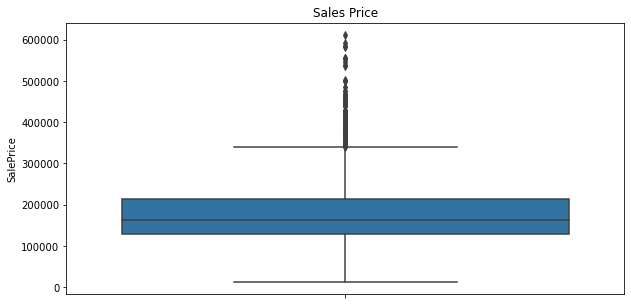

In [152]:
plt.subplots(figsize=(10,5))
plt.title("Sales Price")
ax = sns.boxplot( y=housing_train["SalePrice"])
plt.show()

Median price: $161019.62
Mean price: $177687.50


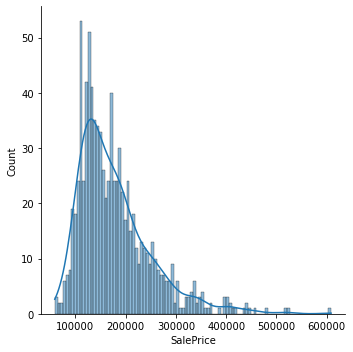

In [153]:
median_val = housing_test["SalePrice"].median()
mean_val = housing_test["SalePrice"].mean()
sns.displot(housing_test['SalePrice'],bins=100,kde=True)
print("Median price: ${:.2f}".format(median_val))
print("Mean price: ${:.2f}".format(mean_val))